# Life Expectancy Prediction

#### Life expectancy gauges the overall health of a community, thereby giving the scope of improving several factors that affect it. In the past few years, there has been a huge improvement in the health sector which has impacted the average age of death of the population. This also resulted in the overall deterioration of the human mortality rate, especially in the developing countries.

#### However, the factors affecting this were not completely analyzed. The effect of alcohol consumption, adult mortality rate, immunization like Hepatitis, Diphtheria and Measles, GDP of a country, and literacy rate have a larger role than expected.

#### The goal of this project is to predict life expectancy based on different factors like immunization, mortality, economic and other health related factors.


Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import xgboost as xg
from sklearn.impute import SimpleImputer
#from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split #ShuffleSplit, cross_val_score, , KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
#from sklearn.preprocessing import RobustScaler,StandardScaler, OneHotEncoder, LabelEncoder
#from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score #mean_squared_error,
#from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')


Loading the dataset into a dataframe 

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Exploratory Data Analysis

In [3]:
df.shape

(2938, 22)

There are 2.9k rows with 22 columns in the given dataset. Let us try to understand more about the data.

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [7]:
df.tail(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [8]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

There are two object type features in the given dataset. In order to apply models, these must be encoded.

In [9]:
print("features:",df.columns)

features: Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [10]:
for feature in df:
    print(feature,":",df[feature].unique())

Country : ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Rep

The above are the distinct values of all the columns.

In [11]:
df.duplicated().sum()

0

There are no duplicates in the given dataset.

In [12]:
df.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

We see a few columns with missing values. Let us find the count of these missing values by feature.

In [13]:
total = df.isnull().sum()
missing_values = pd.concat([total], axis=1, keys=['Total'])
missing_values

,Total
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


# Data Preprocessing

In this step, we shall take raw data and transform it into a format that can be understood by the models we implement.

### 1. Changing column names for easy access by removing extra spaces and adding underscores

In [14]:
df.rename(columns = {" BMI " :"bmi",
                     "Polio": "polio",
                      "Life expectancy ": "life_expectancy",
                      "Adult Mortality":"adult_mortality",
                      "infant deaths":"infant_deaths",
                      "percentage expenditure":"percentage_expenditure",
                      "Hepatitis B":"hepatitisB",
                      "Alcohol":"alcohol",
                      "Status":"status",
                      "Measles ":"measles",
                      "under-five deaths ": "under_five_deaths",
                      "Total expenditure":"total_expenditure",
                      "Diphtheria ": "diphtheria",
                      "Population" : "population",
                      " thinness  1-19 years":"thinness_1-19_years",
                      " thinness 5-9 years":"thinness_5-9_years",
                      " HIV/AIDS":"HIV/AIDS",
                      "Income composition of resources":"income_composition_of_resources",
                     "Schooling":"schooling"}, inplace = True)

### 2. Handling null values in each column of the dataset by imputing them with mean value of the respective column.

In [15]:
na_features=['adult_mortality','life_expectancy','alcohol','hepatitisB','bmi','polio','total_expenditure','diphtheria','GDP','population','thinness_1-19_years','thinness_5-9_years','income_composition_of_resources','schooling']
filling_na=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)

for v in na_features:
    df[v]=filling_na.fit_transform(df[[v]])

In [16]:
df.isnull().sum()

Country                            0
Year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitisB                         0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
HIV/AIDS                           0
GDP                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

### 3. 
### a. Encoding The column 'Status' is a categorical variable with object type. Converting this into numerical variable as it has two values : 0 and 1

In [17]:
def status(x):
    if x == 'Developed':
        return 1
    else:
        return 0

In [18]:
df['status'] = df['status'].apply(status)

In [19]:
df1=copy.deepcopy(df)

### b. Encoding the column 'Year' using get dummies function that convert categorical values into indicator values.

In [20]:
df = pd.get_dummies(df, columns = ['Year'])
print(df)

          Country  status  life_expectancy  adult_mortality  infant_deaths  \
0     Afghanistan       0             65.0            263.0             62   
1     Afghanistan       0             59.9            271.0             64   
2     Afghanistan       0             59.9            268.0             66   
3     Afghanistan       0             59.5            272.0             69   
4     Afghanistan       0             59.2            275.0             71   
...           ...     ...              ...              ...            ...   
2933     Zimbabwe       0             44.3            723.0             27   
2934     Zimbabwe       0             44.5            715.0             26   
2935     Zimbabwe       0             44.8             73.0             25   
2936     Zimbabwe       0             45.3            686.0             25   
2937     Zimbabwe       0             46.0            665.0             24   

      alcohol  percentage_expenditure  hepatitisB  measles   bm

### c. Encoding the column 'Country' using get dummies function that convert categorical values into indicator values.

In [21]:
df = pd.get_dummies(df, columns = ['Country'])

print(df)

      status  life_expectancy  adult_mortality  infant_deaths  alcohol  \
0          0             65.0            263.0             62     0.01   
1          0             59.9            271.0             64     0.01   
2          0             59.9            268.0             66     0.01   
3          0             59.5            272.0             69     0.01   
4          0             59.2            275.0             71     0.01   
...      ...              ...              ...            ...      ...   
2933       0             44.3            723.0             27     4.36   
2934       0             44.5            715.0             26     4.06   
2935       0             44.8             73.0             25     4.43   
2936       0             45.3            686.0             25     1.72   
2937       0             46.0            665.0             24     1.68   

      percentage_expenditure  hepatitisB  measles   bmi  under_five_deaths  \
0                  71.279624     

In [22]:
df

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisB,measles,bmi,under_five_deaths,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,0
1,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,0
2,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,0
3,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,0
4,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,0,0,0,0,0,0,0,0,0,1
2934,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,0,0,0,0,0,0,0,0,0,1
2935,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,0,0,0,0,0,0,0,0,0,1
2936,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,0,0,0,0,0,0,0,0,0,1


### 4. Normalization

In [23]:
numeric_features=['adult_mortality','infant_deaths','alcohol',
                  'percentage_expenditure','hepatitisB','measles',
                  'bmi','under_five_deaths','polio','total_expenditure',
                  'diphtheria','HIV/AIDS','GDP','thinness_1-19_years',
                  'thinness_5-9_years','income_composition_of_resources','schooling']


In [24]:

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
df[numeric_features] = min_max_scaler.fit_transform(df[numeric_features])
df1[numeric_features] = min_max_scaler.fit_transform(df1[numeric_features])
print(df[:1])

   status  life_expectancy  adult_mortality  infant_deaths  alcohol  \
0       0             65.0         0.362881       0.034444      0.0   

   percentage_expenditure  hepatitisB   measles       bmi  under_five_deaths  \
0                0.003659    0.653061  0.005439  0.209733             0.0332   

   ...  Country_United Republic of Tanzania  Country_United States of America  \
0  ...                                    0                                 0   

   Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  \
0                0                   0                0   

   Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
0                                           0                 0   

   Country_Yemen  Country_Zambia  Country_Zimbabwe  
0              0               0                 0  

[1 rows x 229 columns]


# Data Visualization

**Identifying relationship between different factors and Life Expectancy** 

### 1. Correlation Heatmap

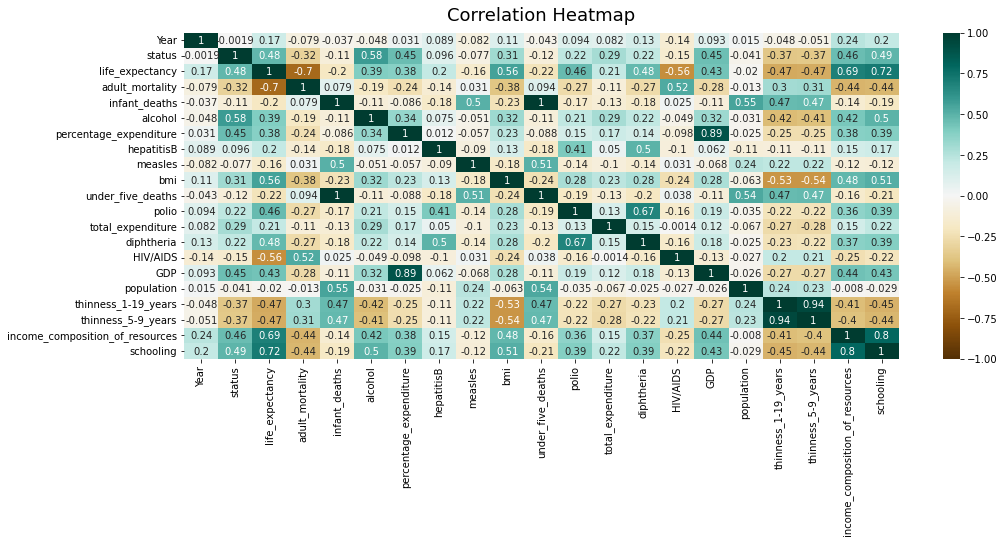

In [25]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

**Correlation observations**:
    
1. Life expectancy has **positive correlation** with schooling and Income composition of resources.
2. Life expectancy has **negative correlation** with adult mortality and HIV/AIDS.
3. Correlation of Life expectancy is not comparable to factors like BMI, Diphtheria, polio and alcohol

To conclude,  the features like schooling and Income composition of resources, adult mortality, HIV/AIDS may be good predictors of Life Expectancy.

Also, Infant death and Alcohol has an unexpected relatioship, this result might be due to outliers.

### 2. Identifying outliers in the data using boxplots

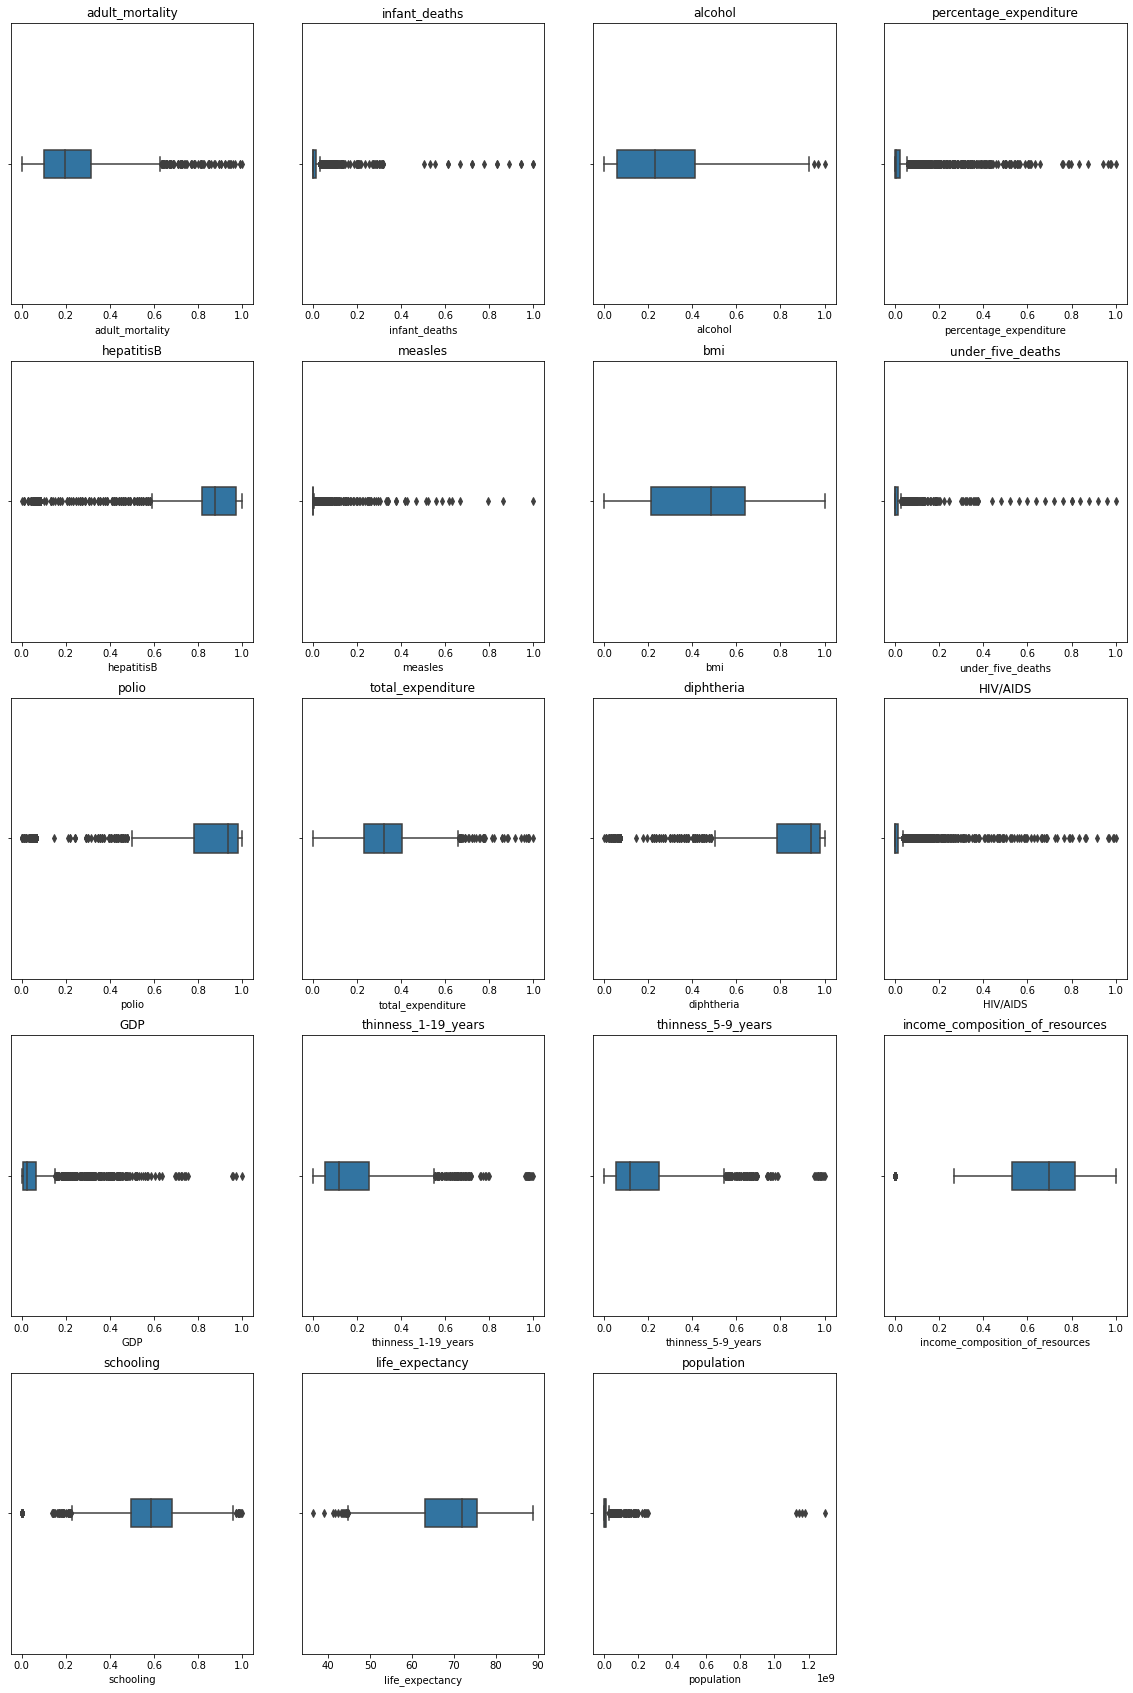

In [26]:
plt.figure(figsize=(20,30))

box_features=copy.deepcopy(numeric_features)

box_features.append("life_expectancy")
box_features.append("population")

for i in range(0,len(box_features)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[box_features[i]], width=0.1)
    plt.title(box_features[i])

plt.show()

It is not always true that the outliers are noisy data. Hence, we are not removing these outliers as it might be helpful in identifying patterns.

### 3. Bar chart between predictor variable - "status" and target variable - "life_expectancy"

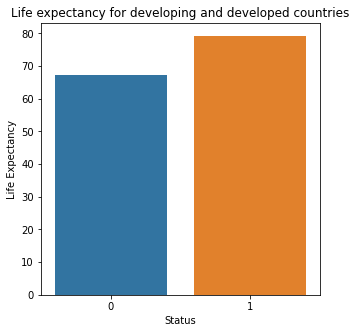

In [27]:
plt.figure(figsize=(5,5))
sns.barplot(x="status",y="life_expectancy",data=df,ci=None)
plt.xlabel("Status",fontsize=10)
plt.ylabel('Life Expectancy',fontsize=10)
plt.title("Life expectancy for developing and developed countries")
plt.show()

We can see that the Developed countries have more years of life expectancy than Developing countries.

### 4. Bar chart to analyse the attribute "country" on "life_expectancy"

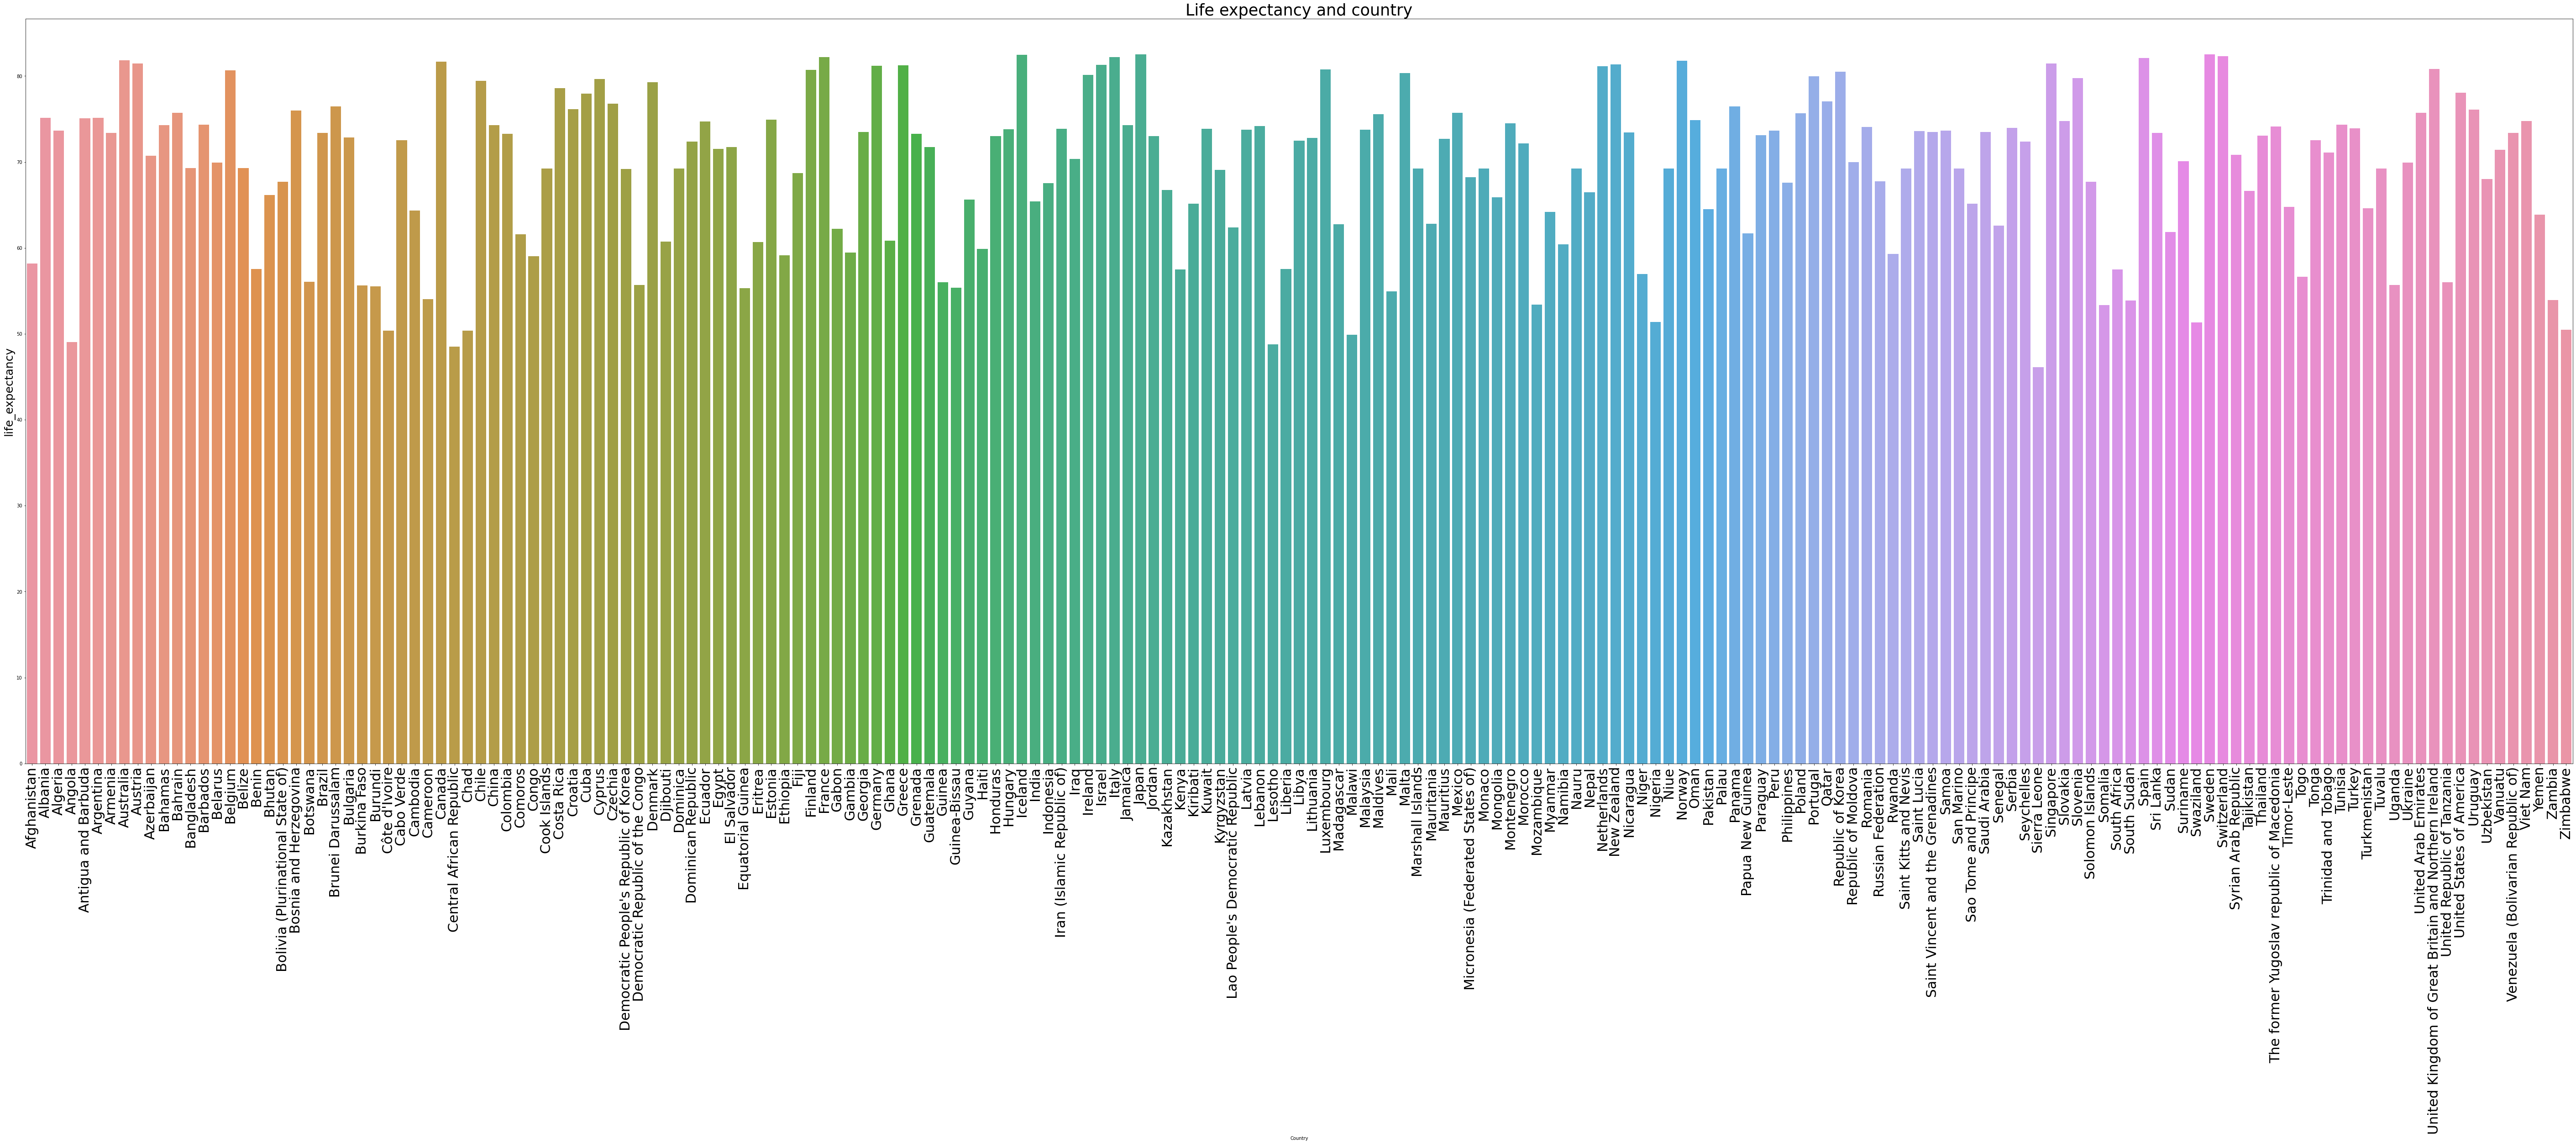

In [28]:
plt.figure(figsize=(100,30))
sns.barplot(x="Country",y="life_expectancy",data=df1,ci=None)
#plt.figure(figsize=(200,50))
plt.xlabel("Country")
plt.xticks(rotation=90,fontsize=30)
plt.ylabel('life_expectancy',fontsize=25)
plt.title("Life expectancy and country",fontsize=35)
plt.show()

For each country, the above bar graph shows the life expectancy.

### 4. Scatter plots between alcohol consumption & life expectancy, and adult mortality & life expectancy

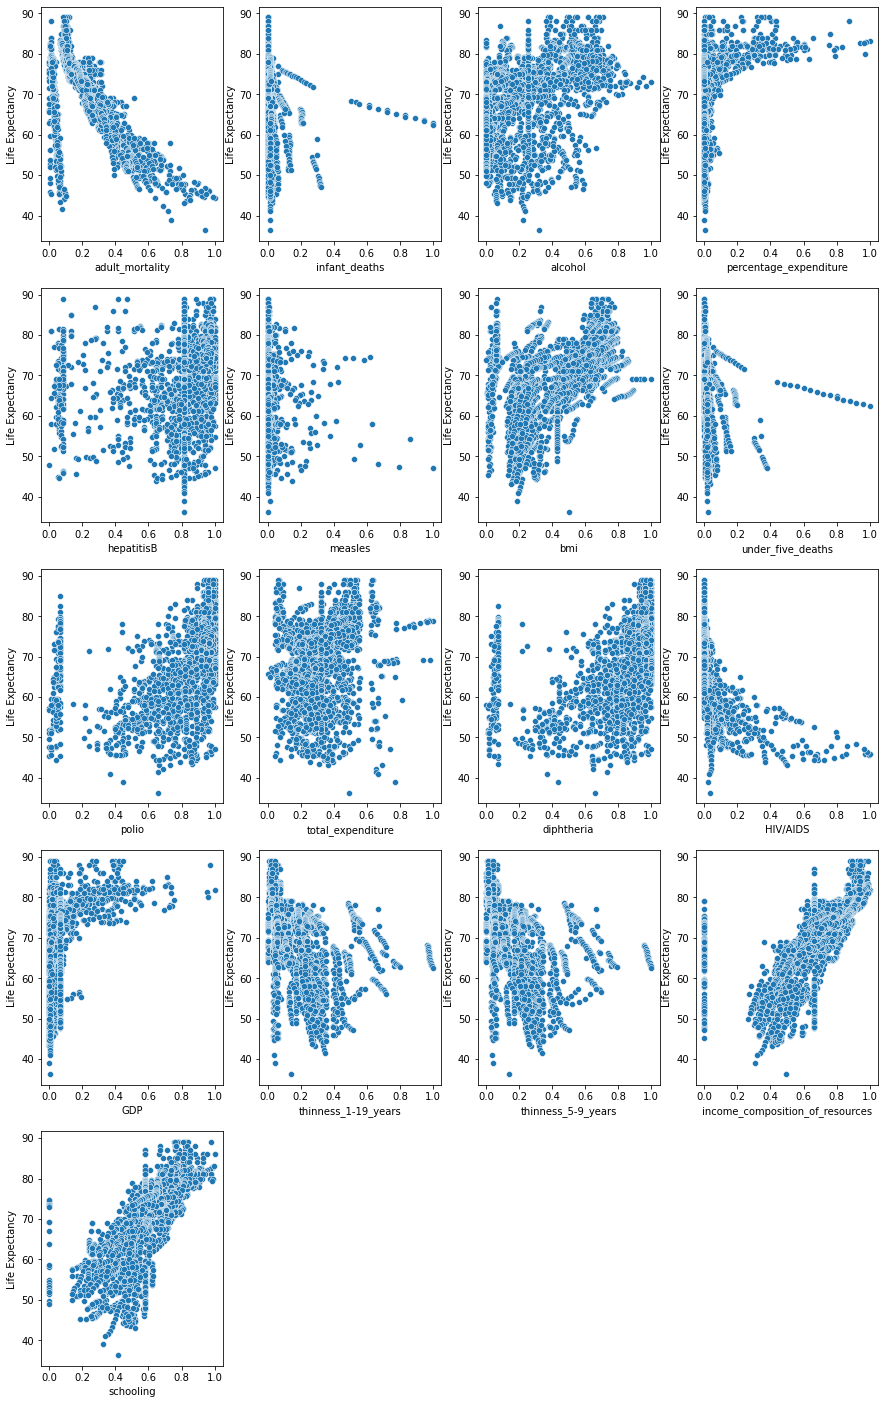

In [29]:
plt.figure(figsize=(15,25))
plt.title("Scatter plot of all attributes vs Life Expectancy")

for i in range(0,len(numeric_features)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(x=numeric_features[i],y= "life_expectancy",data=df)
    plt.xlabel(numeric_features[i])
    plt.ylabel("Life Expectancy")



<!-- ### 6. Line plot between life_expectancy and adult_mortality -->

<!-- ### 7. Line plot between life_expectancy and alcohol -->

<AxesSubplot:xlabel='life_expectancy', ylabel='measles'>

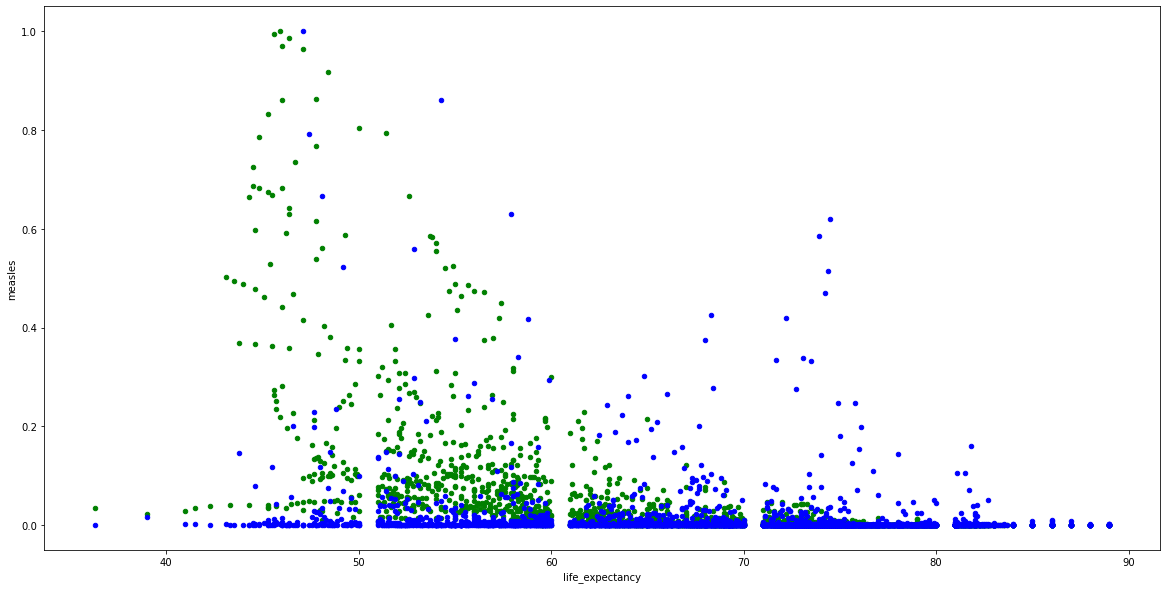

In [30]:
splot = plt.gca()
df.plot(kind='scatter',x='life_expectancy',y='HIV/AIDS', color='green', ax=splot, figsize=(20, 10))
df.plot(kind='scatter',x='life_expectancy',y='measles', color='blue', ax=splot, figsize=(20, 10))

**Observations:**

From the above line plots and scatter plots, it can be understood that the variable 'life_expectancy' has a negative correlation with the variable - 'adult_mortality'. This means that as the rate of deaths of people whose age > 15 and < 60 increases, life expectancy decreases.

So is the case with HIV/AIDS.

Also, it provides an interesting finding that 'life_expectancy' has no correlation with alcohol consumption or measles.


### 5. Histograms

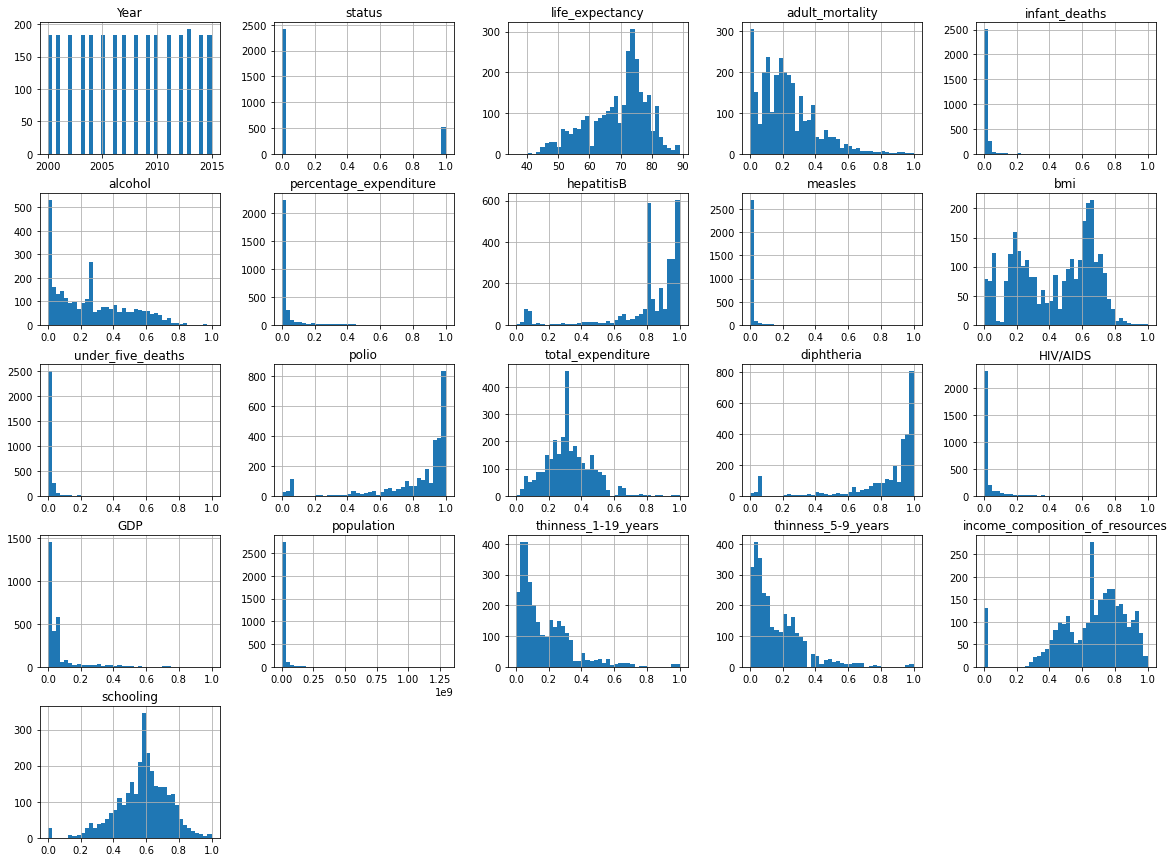

In [31]:
df1.hist(bins=40, figsize=(20,15))
plt.show()

Based on the above visualizations, we can conclude that the possible predicting variables for 'life_expectancy' are: Adult Mortality, Alcohol consumption, HIV with positive relationships and Schooling, Income composition of resources with negative relationships.

# Splitting the data into test and train set

In [32]:
X = df.drop("life_expectancy",axis=1)
y = df["life_expectancy"]

In [33]:
X.columns

Index(['status', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitisB', 'measles', 'bmi',
       'under_five_deaths', 'polio',
       ...
       'Country_United Republic of Tanzania',
       'Country_United States of America', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela (Bolivarian Republic of)', 'Country_Viet Nam',
       'Country_Yemen', 'Country_Zambia', 'Country_Zimbabwe'],
      dtype='object', length=228)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train[:2]

,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisB,measles,bmi,under_five_deaths,polio,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
344,0,0.602493,0.001111,0.347144,0.026314,0.938776,0.000005,0.378911,0.0012,0.96875,...,0,0,0,0,0,0,0,0,0,0
1008,1,0.126039,0.001667,0.697088,0.208299,0.867347,0.028391,0.632677,0.0016,0.96875,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y_test[:1]

1959    77.8
Name: life_expectancy, dtype: float64

In [37]:
y_train.shape

(2350,)

In [38]:
X_test.shape

(588, 228)

In [39]:
X_train.shape

(2350, 228)

# Linear Regression

In [40]:
model_LR = LinearRegression()

In [41]:
model_LR.fit(X_train,y_train)
LRTrainScore = model_LR.score(X_train,y_train)*100
LRTestScore = model_LR.score(X_test,y_test)*100
print("Training Score for Linear Regression:", LRTrainScore)
print("Testing Score for Linear Regression:",LRTestScore)

Training Score for Linear Regression: 96.31433506777537
Testing Score for Linear Regression: 96.46073565155895


In [42]:
output = model_LR.predict(X_test[:1])
print(output)

[78.29905656]


In [43]:
y_pred=model_LR.predict(X_test)
LR_r2_score=r2_score(y_test,y_pred)
print("R2 Score for Linear Regression:", LR_r2_score)

R2 Score for Linear Regression: 0.9646073565155895


# Ridge Regression

In [44]:
ridge_regressor = RidgeCV(cv=10)
  
ridge_regressor.fit(X_train, y_train)
RRTrainScore = ridge_regressor.score(X_train,y_train)*100
RRTestScore = ridge_regressor.score(X_test,y_test)*100

print("Training Score for Ridge Regression:",RRTrainScore)
print("Testing Score for Ridge Regression:",RRTestScore)


Training Score for Ridge Regression: 96.2168074532146
Testing Score for Ridge Regression: 96.35708473679554


In [45]:
output = ridge_regressor.predict(X_test[:1])
print(output)

[78.16217109]


In [46]:
y_pred=ridge_regressor.predict(X_test)
RR_r2_score=r2_score(y_test,y_pred)
print("R2 Score for Ridge Regression:", RR_r2_score)

R2 Score for Ridge Regression: 0.9635708473679554


# Decision Tree

In [47]:
dt = DecisionTreeRegressor(max_depth=15, min_samples_split=10)
dt.fit(X_train, y_train)
DTRTestScore=dt.score(X_test,y_test)*100
DTRTrainScore=dt.score(X_train,y_train)*100
print("Training Score for Decision Tree Regression:",DTRTrainScore)
print("Testing Score for Decision Tree Regression:",DTRTestScore )

Training Score for Decision Tree Regression: 98.79837814334387
Testing Score for Decision Tree Regression: 93.38036614018664


In [48]:
output = dt.predict(X_test[:1])
print(output)

[77.22]


In [49]:
y_pred=dt.predict(X_test)
DTR_r2_score=r2_score(y_test,y_pred)
print("R2 Score for Decision Tree Regression:", DTR_r2_score)

R2 Score for Decision Tree Regression: 0.9338036614018663


# AdaBoost Regressor

In [50]:
ada_reg = AdaBoostRegressor(n_estimators=100)
print(ada_reg)
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None) 



ada_reg.fit(X_train, y_train)


AdaBoostRegressor(n_estimators=100)


AdaBoostRegressor(n_estimators=100)

In [51]:
ABRTrainScore = ada_reg.score(X_train,y_train)*100
ABRTestScore = ada_reg.score(X_test,y_test)*100
print("Training Score for AdaBoost Regression:",ABRTrainScore)
print("Testing Score for AdaBoost Regression:",ABRTestScore )

Training Score for AdaBoost Regression: 90.70364963829132
Testing Score for AdaBoost Regression: 90.31908022119832


In [52]:
output = ada_reg.predict(X_test[:1])
print(output)

[73.47277561]


In [53]:
y_pred=ada_reg.predict(X_test)
ABR_r2_score=r2_score(y_test,y_pred)
print("R2 Score for AdaBoost Regression:", ABR_r2_score)

R2 Score for AdaBoost Regression: 0.9031908022119832


# XGBoost Regression

In [54]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_test)
 

[15:28:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [55]:
XGBTrainScore = xgb_r.score(X_train,y_train)*100
XGBTestScore = xgb_r.score(X_test,y_test)*100

print("Training Score for XGBoost Regression:",XGBTrainScore)
print("Testing Score for XGBoost Regression:",XGBTestScore )

Training Score for XGBoost Regression: 91.47861892625534
Testing Score for XGBoost Regression: 91.35947189207405


In [56]:
output = xgb_r.predict(X_test[:1])
print(output)

[73.09419]


In [57]:
y_pred=xgb_r.predict(X_test)
XGB_r2_score=r2_score(y_test,y_pred)
print("R2 Score for XGBoost Regression:", XGB_r2_score)

R2 Score for XGBoost Regression: 0.9135947189207405


# Comparing all the models based on accuracy metrics

In [58]:
FinalScore=pd.DataFrame({"Model name":["Linear Regression","Ridge Regression",
                                 "Decision Tree Regression","Adaboost Regression","XGBoost Regression"],
                   "Accuracy score(testing)":[LRTestScore, RRTestScore, DTRTestScore, ABRTestScore,XGBTestScore]})


In [59]:
FinalScore

,Model name,Accuracy score(testing)
0,Linear Regression,96.460736
1,Ridge Regression,96.357085
2,Decision Tree Regression,93.380366
3,Adaboost Regression,90.319080
4,XGBoost Regression,91.359472


In [60]:
FinalR2Score=pd.DataFrame({"Model name":["Linear Regression","Ridge Regression",
                                 "Decision Tree Regression","Adaboost Regression","XGBoost Regression"],
                   "R2 score(testing)":[LR_r2_score, RR_r2_score, DTR_r2_score, ABR_r2_score,XGB_r2_score]})


In [61]:
FinalR2Score

,Model name,R2 score(testing)
0,Linear Regression,0.964607
1,Ridge Regression,0.963571
2,Decision Tree Regression,0.933804
3,Adaboost Regression,0.903191
4,XGBoost Regression,0.913595


#### We choose to understand the best model that predicts the output target variable – ‘Life expectancy’ when different predictor variable values are fed into each model. All the models implemented in this project seem to predict the life expectancy given its independent variables. Using evaluating criteria, we could clearly see better performance being shown by Ridge and Linear regressors competing, albeit the presence of powerful regressors like Adaptive Boosting or XGBoost.